## **Time Measurements**

#### `Name & Surname: Abdulkadir Arslan`

##### **THE PACKAGES**

In [7]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
import random

##### **THE DATA LOADING**

In [8]:
df_nodes = pd.read_csv('fb-pages-tvshow.nodes')
df_nodes.head()

,id,name,new_id
0,183215455178728,Orange is the New Black,1852
1,282808121926963,狮城有约 Hello Singapore,592
2,179653538737148,DC Cupcakes,1370
3,162816367111296,Gladiatorerna,1263
4,134115896703387,Globo Rural,3042


In [9]:
df_edges = pd.read_csv('fb-pages-tvshow.edges', names=['node_1', 'node_2'])
df_edges.head()

,node_1,node_2
0,0,1838
1,0,1744
2,0,14
3,0,2543
4,1,1009


In [10]:
df = df_edges.copy()
df.head()

,node_1,node_2
0,0,1838
1,0,1744
2,0,14
3,0,2543
4,1,1009


In [11]:
print("Shape of the DataFrame (number of rows, number of columns):", df.shape)

duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    df = df.drop_duplicates(keep='first')
    print("Duplicates have been removed.")
else:
    print("No duplicates found in the DataFrame.")

Shape of the DataFrame (number of rows, number of columns): (17262, 2)
No duplicates found in the DataFrame.


##### **CREATING THE GRAPH**

In [12]:
G = nx.from_pandas_edgelist(df= df, source="node_1", target="node_2", create_using=nx.Graph())

graph_properties_dict = dict()

graph_properties_dict['num_of_nodes'] = len(G.nodes())
graph_properties_dict['num_of_edges'] = len(G.edges())

display(f'The number of the nodes: ', len(G.nodes()))
display(f'The number of the edges: ', len(G.edges()))

'The number of the nodes: '

3892

'The number of the edges: '

17262

##### **THE FUNCTION TO SAMPLE THE SUBGRAPHS**

In [13]:
subgraph_sizes = np.linspace(400, 2500, num=10, dtype=int)

num_samples = 3

def sample_subgraphs(G, sizes, num_samples):
    subgraphs = {}
    for size in sizes:
        subgraphs[size] = []
        for _ in range(num_samples):
            nodes = random.sample(G.nodes, size)
            subgraph = G.subgraph(nodes).copy()
            subgraphs[size].append(subgraph)
    return subgraphs

subgraphs = sample_subgraphs(G, subgraph_sizes, num_samples)

In [31]:
subgraph_sizes

array([ 400,  633,  866, 1100, 1333, 1566, 1800, 2033, 2266, 2500])

##### **THE FUNCTION TO MEASURE THE RUNTIME OF CENTRALITY COMPUTATIONS**

In [24]:
def measure_runtime(subgraphs, metric_func):
    runtimes = {}
    for size, graphs in subgraphs.items():
        runtimes[size] = []
        for graph in graphs:
            start_time = time.time()
            metric_func(graph)
            end_time = time.time()
            runtimes[size].append(end_time - start_time)
    return runtimes

degree_runtimes = measure_runtime(subgraphs, nx.degree_centrality)
closeness_runtimes = measure_runtime(subgraphs, nx.closeness_centrality)
betweenness_runtimes = measure_runtime(subgraphs, nx.betweenness_centrality)

In [25]:
degree_runtimes

{400: [0.0011181831359863281, 0.0, 0.001013040542602539],
 633: [0.0009987354278564453, 0.0, 0.0009996891021728516],
 866: [0.0010006427764892578, 0.0010056495666503906, 0.0],
 1100: [0.003995418548583984, 0.0010006427764892578, 0.001999378204345703],
 1333: [0.0020008087158203125, 0.002001047134399414, 0.003034830093383789],
 1566: [0.00296783447265625, 0.003994464874267578, 0.002031564712524414],
 1800: [0.0020074844360351562, 0.002008676528930664, 0.0010461807250976562],
 2033: [0.0015416145324707031, 0.0020461082458496094, 0.001973390579223633],
 2266: [0.0020012855529785156, 0.0009984970092773438, 0.0020322799682617188],
 2500: [0.0019941329956054688, 0.001596212387084961, 0.0021126270294189453]}

In [26]:
closeness_runtimes

{400: [0.006015777587890625, 0.00999593734741211, 0.00899958610534668],
 633: [0.08317327499389648, 0.046730756759643555, 0.028014183044433594],
 866: [0.20729422569274902, 0.03787422180175781, 0.05100107192993164],
 1100: [0.2796764373779297, 0.15477895736694336, 0.21511077880859375],
 1333: [0.6695330142974854, 0.8663737773895264, 0.8058273792266846],
 1566: [1.1935946941375732, 1.5230748653411865, 2.1460487842559814],
 1800: [4.130272150039673, 5.400005340576172, 4.95414137840271],
 2033: [8.969003438949585, 6.385353088378906, 3.9686439037323],
 2266: [9.4569091796875, 11.411375761032104, 12.207864999771118],
 2500: [8.937391757965088, 6.83300518989563, 7.097626209259033]}

In [27]:
betweenness_runtimes

{400: [0.038055419921875, 0.03167843818664551, 0.030500411987304688],
 633: [0.1525280475616455, 0.11090874671936035, 0.08246231079101562],
 866: [0.7136101722717285, 0.4046649932861328, 0.5147554874420166],
 1100: [1.2316854000091553, 0.8786501884460449, 1.0816452503204346],
 1333: [2.349496364593506, 2.5027480125427246, 2.630462169647217],
 1566: [4.938858509063721, 5.407530307769775, 4.763822793960571],
 1800: [7.809581518173218, 7.9787819385528564, 7.952044248580933],
 2033: [12.465424299240112, 12.372219562530518, 10.637735605239868],
 2266: [19.69350266456604, 18.893991231918335, 20.713974475860596],
 2500: [34.91570281982422, 34.495107889175415, 25.22413992881775]}

##### **A VISUALIZATION FOR THE AVERAGE RUNTIME OF THE THREE CENTRALITY MEASURES OVER DIFFERENT SUBGRAPH SIZES**

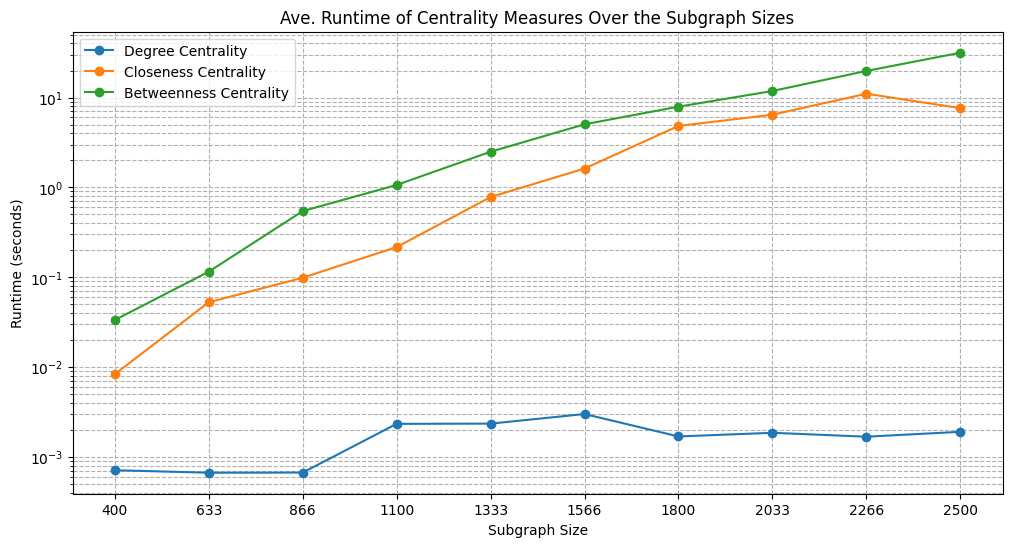

In [53]:
def plot_runtimes(subgraph_sizes, degree_runtimes, closeness_runtimes, betweenness_runtimes):
    avg_degree_runtimes = [np.mean(degree_runtimes[size]) for size in subgraph_sizes]
    avg_closeness_runtimes = [np.mean(closeness_runtimes[size]) for size in subgraph_sizes]
    avg_betweenness_runtimes = [np.mean(betweenness_runtimes[size]) for size in subgraph_sizes]

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(subgraph_sizes)), avg_degree_runtimes, label='Degree Centrality', marker='o')
    plt.plot(range(len(subgraph_sizes)), avg_closeness_runtimes, label='Closeness Centrality', marker='o')
    plt.plot(range(len(subgraph_sizes)), avg_betweenness_runtimes, label='Betweenness Centrality', marker='o')
    plt.xticks(range(len(subgraph_sizes)), subgraph_sizes)  # Set custom tick labels
    plt.yscale('log')
    plt.xlabel('Subgraph Size')
    plt.ylabel('Runtime (seconds)')
    plt.title('Ave. Runtime of Centrality Measures Over the Subgraph Sizes')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

plot_runtimes(subgraph_sizes, degree_runtimes, closeness_runtimes, betweenness_runtimes)


##### **INTERPRATION OF THE RESULTS**

- The runtime analysis of degree, closeness, and betweenness centrality measures reveals the computational complexity associated with each measure. As expected, the three centrality measures('degree centrality', 'closeness centrality', and 'betweenness centrality') showed different runtime across all subgraph sizes. 

- Degree centrality, the simplest measurement, showed the shortest runtime across all subgraph sizes, and also a fluctuation in runtime behavior was observed for degree centrality. To explain these fluctuations, it's essential to consider the interplay between graph structure, algorithm complexity, resource allocation, and sampling variability. Analyzing these factors in more detail could provide insights into the observed runtime behavior of degree centrality across different subgraph sizes.

- Closeness centrality, which requires computing the shortest paths between nodes, showed a longer runtime than the degree centrality and a shorter than the betweennes centrality across all subgraph sizes. It exhibited a moderate increase in runtime as the subgraph size grew until the size of 2226, however, the runtime decreased between the size of 2226 and 2500. There might be many reasons that caused the unecpected decrease and I described some cases below;
  - The specific nodes and edges included in the subgraphs of size 2226 and 2500 might lead to different network structures, affecting the efficiency of shortest path calculations. For instance, a subgraph with more high-degree nodes or shorter average path lengths could result in faster computations.
  - Certain subgraphs might inherently have properties (e.g., higher connectivity or fewer disconnected components) that make shortest path computations more efficient, even if the subgraph size is larger.
  - The underlying algorithms used by NetworkX to compute shortest paths and closeness centrality might perform better on specific types of graphs. If the larger subgraph (2500 nodes) has a structure that is more favorable for these algorithms, it could lead to reduced runtime.
  - In some cases, certain data structures or intermediate results might be cached or reused in ways that benefit larger computations, leading to improved performance for larger subgraphs.
  - System performance and variability (such as system load, memory usage, or CPU)
  - Some of the explained cases can be said for the fluctuation in runtime behavior of the degree centrality.

- Betweenness centrality, which involves extensive shortest-path calculations, demonstrates the most obvious increase in runtime, highlighting its higher computational demand while increases in the subgraph sizes as well as showing the highest runtime compare to the other two centrality measurements.

##### **REFLECTING ON THE EXPERIMENTAL SETUP CRITICALLY**

**My Choices**

*Subgraph Sizes:*

- I chose subgraph sizes using a linear scale (np.linspace) ranging from 400 to 2500. This range is suitable given the overall size of the original graph (3863 nodes), allowing us to explore subgraphs of varying sizes without approaching the total number of nodes in the graph.

- The chosen sizes ensure a balance between computational feasibility and meaningful analysis, capturing the performance trends over a significant portion of the graph’s size.

*Number of Samples:*

- I opted for 3 samples per subgraph size. While this number is sufficient for a preliminary analysis, it may not fully account for variability in runtime due to the inherent randomness in the sampling process.

- A higher number of samples would provide more robust results but at the cost of increased computational effort. Three samples strike a balance between accuracy and efficiency.

**Choices in the Task**

*Ten Different Subgraph Sizes:*

- The task's requirement to choose ten different subgraph sizes is reasonable, ensuring a comprehensive evaluation of how the runtime scales with subgraph size.

- This allows for detailed observations of runtime trends across a range of sizes, enhancing the robustness of the analysis.

*Random Selection of Nodes:*

- The random sampling procedure can introduce variability in the characteristics of the subgraphs, such as their density, connectivity, and distribution of centrality measures. This variability can affect the runtime of the centrality computations.

- Different samples of the same size may have different topological properties, leading to variations in runtime. This highlights the importance of sampling multiple subgraphs to obtain an average runtime that reflects general trends rather than outliers.

*Induced Subgraphs:*

- By inducing subgraphs from the randomly selected nodes, we ensure that the subgraphs maintain the original graph's structural properties as much as possible.

- This method preserves the network's connectivity patterns, providing a more accurate representation of the runtime behavior for centrality measures on the full graph.

**Overall Reflection**

The experimental setup, combining both my choices and the task's requirements, provides a balanced approach to analyzing the runtime of centrality measures. While the chosen subgraph sizes and number of samples offer a practical and feasible means of conducting the analysis, it is important to acknowledge the potential variability introduced by the random sampling procedure. Increasing the number of samples could further enhance the robustness of the results. Additionally, instead of a linear scales, a logarithmic scales for subgraph sizes might have given different insights into the performance trends over different size ranges. Overall, the setup allows us to draw meaningful conclusions about the computational efficiency of different centrality measures on large graphs, while also highlighting areas for potential optimization in future analyses.